#  Predicting the sales price of Bulldozers(🚛) using Machine Learning.
In this noteboiok we are going to go through an example machin learning project with goal of predicting sales prices of bull dozers.

## 1. Problem Definition
> How well can we predict prices of bulldozers, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data 
The data is dowloaded from kaggle Blue Book for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are three main datasets:
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
For more evaluation ion this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note**: The goal for most regression evaluation metrics is to minimize the error. For example, oiur goal for this machine learning project is tio build a model which minimises RMSLE.

## 4. Features
Kaggle provides data  dictionary detailing of all the features of datasets, which can be seen from data section in the link provided above. 



In [1]:
import pandas as pd
import numpy as np
import sklearn 
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('TrainAndValid.csv',low_memory = False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.SalePrice

0         66000.0
1         57000.0
2         10000.0
3         38500.0
4         11000.0
           ...   
412693    10000.0
412694    10500.0
412695    12500.0
412696    10000.0
412697    13000.0
Name: SalePrice, Length: 412698, dtype: float64

In [5]:
df["saledate"]

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

In [6]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

<AxesSubplot:ylabel='Frequency'>

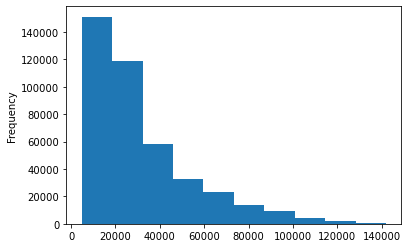

In [7]:
df.SalePrice.plot.hist()

### Parsing Dates

When we are working with time series data, we want to enrich time and date series data as much as possible.

We can do that by telling pandas which column has date in it by using `parse_dates` parameter.

In [8]:
# Import the data again but this time parse dates
#low_memory is used because this dataset has large no. of columns.

df= pd.read_csv("TrainAndValid.csv", low_memory = False, parse_dates = ["saledate"])

In [9]:
df["saledate"].dtypes

dtype('<M8[ns]')

In [10]:
df.saledate
#notice that dtype has changed.

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

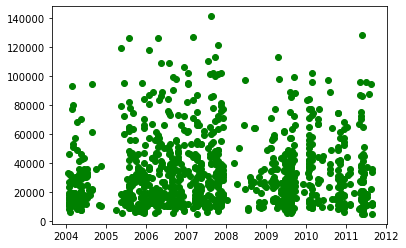

In [11]:
fig,ax = plt.subplots()
ax = plt.scatter(df["saledate"][:1000], df["SalePrice"][:1000],color="Green")

In [12]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df["saledate"]

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [14]:
## Sort date by Saledate
df.sort_values(by = ["saledate"], inplace = True, ascending = True)
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original dataframe
We make a copy of the original datframe so when we manipulate the copy, we've still got our original data.

In [15]:
#Make a copy
df_temp = df.copy()

In [16]:
df_temp.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Add datetime parameters for `saledate` column

In [17]:
df_temp[:1].saledate.dt.year

205615    1989
Name: saledate, dtype: int64

In [18]:
df_temp[:2].saledate.dt.day

205615    17
274835    31
Name: saledate, dtype: int64

In [19]:
df_temp[:1].saledate.dt.dayofyear

205615    17
Name: saledate, dtype: int64

**Feature Engineering**

In [20]:
#datetime is accessed using dt
df_temp["year"] = df_temp.saledate.dt.year
df_temp["day"] = df_temp.saledate.dt.day
df_temp["month"] =df_temp.saledate.dt.month
df_temp["saledayofweek"] = df_temp.saledate.dt.dayofweek

In [21]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [22]:
# Now that we have enriched our dataframe with saledate features, we can drop our saledate column from temp. dataframe
df_temp.drop("saledate", axis =1, inplace = True)

In [23]:
# Check the values of different columns
df["state"].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modelling
We have done enough Exploratory Data Analysis (we can always do more) but let's start to do some model driven EDA

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [174]:
#Let's build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs =-1, 
                             random_state = 42)# (n_jobs=-1) as many cause as possible on my computer
model.fit(df_temp.drop("SalePrice",axis = 1), df_temp["SalePrice"])

KeyboardInterrupt: 

In [25]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Convert Strings to categories
One way we can turn all of our data into numbers is by converting them into pandas categories.
> We can check diifferent datatypes categories here:
https://pandas.pydata.org/pandas-docs/version/0.25.3/reference/general_utility_functions.html#data-types-related-functionality

In [26]:
pd.api.types.is_string_dtype(df_temp["UsageBand"])

True

In [27]:
#Find the value which contains strings
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)
# Here label is as key, and content as values df_temp is taken as dictionary.

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [28]:
# see an example what's happened above
random_dict = {'key1' : 'Hello',
              "key2": 'World'}

In [29]:
for key, value in random_dict.items():
    print (f"this is key:{key}",
          f"this is a value:{value}")

this is key:key1 this is a value:Hello
this is key:key2 this is a value:World


In [30]:
# This will turn all the strings into categorical values
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

# as_ordered: here asks pandas to order all these data ,like name of states in ascending order

In [31]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [32]:
# category is accessed using 'cat'
df_temp.state.cat.categories #under the hood pandas treat these names as numbers when converted to category
#i.e it wil assign all the values here with numerical values.

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [33]:
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [34]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [35]:
df_temp['state'].head()

205615      Texas
274835    Florida
141296    Florida
212552    Florida
62755     Florida
Name: state, dtype: category
Categories (53, object): ['Alabama' < 'Alaska' < 'Arizona' < 'Arkansas' ... 'Washington DC' < 'West Virginia' < 'Wisconsin' < 'Wyoming']

**Thanks to pandas as we have a way to access all of our  data as  numbers.
But we still have a bunch of missing numbers..**

In [36]:
# check % of missing data in each column
df_temp.isnull().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save preprocessed data

In [38]:
# Export current tmp to dataframe
df_temp.to_csv("train_temp.csv")

In [39]:
df_check = pd.read_csv("train_temp.csv", low_memory = False)

In [40]:
df_check.head()

,Unnamed: 0,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,...,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,year,day,month,saledayofweek
0,205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,...,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,17,1,1
1,274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,...,NaN,NaN,NaN,NaN,Standard,Conventional,1989,31,1,1
2,141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,...,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,31,1,1
3,212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,...,NaN,NaN,NaN,NaN,Standard,Conventional,1989,31,1,1
4,62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,...,NaN,None or Unspecified,PAT,Lever,NaN,NaN,1989,31,1,1


In [41]:
# notice that in above data there is unnamed column , so we will fix it using index = False 
df_temp.to_csv("train_temp_data.csv", index= False)

In [37]:
df_temp = pd.read_csv("train_temp_data.csv", low_memory = False)

In [38]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,year,day,month,saledayofweek
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,17,1,1
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,NaN,Standard,Conventional,1989,31,1,1
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,31,1,1
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,NaN,Standard,Conventional,1989,31,1,1
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,NaN,None or Unspecified,PAT,Lever,NaN,NaN,1989,31,1,1


In [39]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


### Filling missing values
**Fill numerical missing values first**

In [40]:
# check which columns are numeric
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
year
day
month
saledayofweek


In [41]:
# check which numeric columns have null value in it:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [89]:
# Fill numeric rows with the median
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Add a binary column which tells us if the data was missing or not
            df_temp[label+"_is_missing"] = pd.isnull(content)# we are keeping the fact that if the original data in call was missing or not
            # Fill missing values with the median
            df_temp[label]= content.fillna(content.median()) 

In [90]:
len(df_temp)

412698

In [91]:
# Demonstrate how median is more robust than mean
hundreds = np.full((1000,),100) # 100 thousand times
hundreds_billion = np.append(hundreds,1000000000)#adding 1 billion to the list
np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds), np.median(hundreds_billion)

(100.0, 999100.8991008991, 100.0, 100.0)

In [92]:
len(hundreds)

1000

In [93]:
len(hundreds_billion)

1001

In [94]:
# Check if there is any  null numeric value:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
# Notice it prints out nothing as we've filled all the missing numeric values .

In [95]:
#check to see how many examples were missing
df_temp["auctioneerID_is_missing"].value_counts()

# it comes from: df_temp[label+"_is_missing"]= pd.isnull(content)

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [96]:
# We still have missing values
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 102, dtype: int64

### Filling and turning categorical variables into numbers

In [97]:
# check for columns which aren't numeric
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

In [98]:
pd.Categorical(df_temp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [99]:
# Turn categorical values into numbers and fill missing values
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Add binary column to indicate whether sample has missing values or not
        df_temp[label+"_is_missing"]= pd.isnull(content)
        #Turn categorical into numbers and add+1
        df_temp[label]= pd.Categorical(content).codes+1

> * Pandas categories work as if there is any missing values in categorical column it assign -1 value to it.

In [100]:
#e.g
pd.Categorical(df_temp["UsageBand"]).codes
#since we have executed the above code earlier this codes gives 0 after adding+1, as it would have given -1 to missing one. 

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [101]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 102 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(9), int8(40)
memory usage: 74.8 MB


In [102]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [103]:
df_temp.isna().sum()
#notice that there isn't any missing values in any row.

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 102, dtype: int64

**Now that all of our data is numeric and there is no missing values in our dataframe, we should be able to build a machine learning models.**

In [104]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [90]:
%%time
#Instantiate models
model = RandomForestRegressor(n_jobs = -1, random_state= 42)

# Fit the model
model.fit(df_temp.drop("SalePrice", axis = 1), df_temp["SalePrice"])

Wall time: 15min 35s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [91]:
# Score the model
model.score(df_temp.drop("SalePrice", axis = 1), df_temp["SalePrice"])

0.9875231307945159

**Question: Why doesn't above metric hold water? (why it isn't reliable?)**

### Splitting data into train and validation set

In [105]:
df_temp.year

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: year, Length: 412698, dtype: int64

In [106]:
df_temp.year.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: year, dtype: int64

> * As given in kaggle dataset , this set of data has train and valid data. Here, data for year 2012 is valid set and rest all lies in train set.

In [107]:
#Split the data into training and validation set
df_val = df_temp[df_temp.year==2012]
df_train = df_temp[df_temp.year != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [108]:
# Split the data into x and y
x_train, y_train = df_train.drop("SalePrice", axis = 1), df_train["SalePrice"]
x_valid, y_valid = df_val.drop("SalePrice", axis =1), df_val["SalePrice"]

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((401125, 101), (401125,), (11573, 101), (11573,))

In [109]:
y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

### Building an evaluation Function

In [110]:
# Create an evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

# since root_mean_squared_log_error is not in sklearn evaluation metrics, we will define it as competition asks so.
def rmsle(y_test, y_preds):
    """
    Calculate root mean squared log error between prediction and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_score(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores={"Training MAE": mean_absolute_error(y_train, train_preds),
           "Valid MAE": mean_absolute_error(y_valid, val_preds),
           "Training RMSLE": rmsle(y_train, train_preds),
           "Valid RMSLE": rmsle(y_valid, val_preds),
           "Training R^2": r2_score(y_train, train_preds),
           "Valid R^2": r2_score(y_valid, val_preds),
           }
    return scores

### Testing our model on a subset(to tune the hyperparameters)


In [111]:
# This takes far too long

#model = RandomForestRegressor(n_jobs = -1,
                            # random_state = 42)
#model.fit(x_train, y_train)

In [112]:
len(x_train)

401125

In [113]:
model = RandomForestRegressor(n_jobs=-1,
                             random_state = 42)

                            
model

RandomForestRegressor(n_jobs=-1, random_state=42)

> Note: If max_samples = 0 i.e(by default its 0), if we check docstring, the model functions on whole dataset, i.e x.shape[0],so we can change max_samples, to reduce the execution time of our model and work on less dataset.

In [114]:
x_train.shape[0] #since n_estimators =100, each estimators will see on every row as result below , i.e a very large no.

401125

In [115]:
x_train.shape[0]*100

40112500

In [64]:
model = RandomForestRegressor(n_jobs=-1,
                             random_state = 42,
                             max_samples = 10000)

                            
model

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [65]:
# if we set max_samples =10000, the model will compute on
10000*100 #(samples *estimator)

1000000

In [66]:
# when we compute the difference we get to work on 40 times less data.
(x_train.shape[0]*100)/1000000

40.1125

In [76]:
%%time
# cutting down on max no.of samples each estimator can see improve in training time.

model.fit(x_train, y_train)


Wall time: 19.9 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [77]:
show_score(model)
#the closer the value of RMSE is to zero , the better is the Regression Model

{'Training MAE': 5546.737772390152,
 'Valid MAE': 7126.35731271062,
 'Training RMSLE': 0.25716109040750285,
 'Valid RMSLE': 0.2906123125066764,
 'Training R^2': 0.8612637799046343,
 'Valid R^2': 0.8339481802675335}

### Hyperparameter tuning with RandomizedSearchCV

In [78]:
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

In [80]:

from sklearn.model_selection import RandomizedSearchCV

#different RandomForestRegressor Hyperparameters
rf_grid = {"n_estimators": np.arange(10,100,10),
          "max_depth":[None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2),
          "max_features":[0.5, 1, "sqrt","auto"],
          "max_samples":[10000]}

#Instantiate RandomizedSearchmodel
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs =-1,
                                                   random_state=42),
                              param_distributions= rf_grid,
                              n_iter = 2,# when more computer power or time we can increase it to 100 for maybe more iters
                              cv=5,
                              verbose = True)
                                                   
#Fit the model
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [ ]:
# Find the best model hyperparameters
rs_model.best_params_

In [119]:
show_score(rs_model)
# valid RMSLE has worsened from above results due to less iterations. 

{'Training MAE': 8900.786952524397,
 'Valid MAE': 11339.331064624426,
 'Training RMSLE': 0.3918380591551543,
 'Valid RMSLE': 0.4465884289557781,
 'Training R^2': 0.6805483947387062,
 'Valid R^2': 0.6339750073519853}

In [84]:
# checking by increasing n_iters
rf_check_grid = {"n_estimators": np.arange(10,100,10),
          "max_depth":[None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2),
          "max_features":[0.5, 1, "sqrt","auto"],
          "max_samples":[10000]}

#Instantiate RandomizedSearchmodel
rs_check_model = RandomizedSearchCV(RandomForestRegressor(n_jobs =-1,
                                                   random_state=42),
                              param_distributions= rf_check_grid,
                              n_iter = 5,# when more computer power or time we can increase it to 100 for maybe more iters
                              cv=5,
                              verbose = True)
                                                   
#Fit the model
rs_check_model.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  3.8min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [121]:
rs_check_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 10}

In [122]:
show_score(rs_check_model)

{'Training MAE': 6923.110839251901,
 'Valid MAE': 7958.455827919219,
 'Training RMSLE': 0.308210476874566,
 'Valid RMSLE': 0.3222249347799406,
 'Training R^2': 0.7964789567970805,
 'Valid R^2': 0.7997305902922558}

### Train a model with best Hyperparameters
**Note**:  These were found after 100 iterations(n_estimators=100)  of `RandomizedSearchCV`(course guide)
* Its not that every PC will result same (best_params_)Hyperparameters , since it takes lot of iterations and several parameters , results might vary a bit.

In [128]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split= 14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42)

#Fit the model
ideal_model.fit(x_train, y_train)

Wall time: 1min 26s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [82]:
#scores for ideal model(trained on all the data)
show_score(ideal_model)

{'Training MAE': 2995.7225939974164,
 'Valid MAE': 5914.800081879167,
 'Training RMSLE': 0.1461224676605872,
 'Valid RMSLE': 0.2439106410557975,
 'Training R^2': 0.957745490762547,
 'Valid R^2': 0.8822030282873409}

In [85]:
#scores on rs_check_model(trained on only 10,000 examples)
show_score(rs_check_model)

{'Training MAE': 6695.947527128107,
 'Valid MAE': 8166.8879666430275,
 'Training RMSLE': 0.2986995745702549,
 'Valid RMSLE': 0.32434948410296927,
 'Training R^2': 0.8029557927277986,
 'Valid R^2': 0.7769185969850452}

### Make predictions on test data

In [116]:
#Import the test data
df_test = pd.read_csv("Test.csv",
                     low_memory= False,
                     parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [117]:
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1999,1000,2004,2006,2005
MachineHoursCurrentMeter,3688,28555,6038,8940,2286
UsageBand,Low,High,Medium,High,Low
saledate,2012-05-03 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00
fiModelDesc,580G,936,EC210BLC,330CL,650K


In [87]:
#Make predictions on test dataset

test_preds = ideal_model.predict(df_test)

ValueError: could not convert string to float: 'Low'

In [125]:
df_test.isna().sum()
# there are missing values in test dataset

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [126]:
df_test.info()
# notice that column lengths are also different

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

### Preprocessing the data(getting the test dataset into same format as our training dataset)

In [118]:
def preprocess_data(df):
    """
    Performs transformation on df and returns transformed df.
    """
    df["year"] = df.saledate.dt.year
    df["day"] = df.saledate.dt.day
    df["month"] =df.saledate.dt.month
    df["saledayofweek"] = df.saledate.dt.dayofweek
    
    df.drop("saledate",axis =1, inplace =True)
    
    #fill the numeric rows with median
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                #add a binary column which tells us if the data was missing
                df[label+"_is_missing"]= pd.isnull(content)
                #fill the missing numeric values with median
                df[label] = content.fillna(content.median())
                
            #Fill categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"]= pd.isnull(content)
            #we add+1 to the category code because pandas encodes missing data categories as -1.
            df[label]= pd.Categorical(content).codes+1
                
                
                
                
    return df
                

In [119]:
# Process the test data
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [83]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [121]:
# we can find how the column differs using set
set(x_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [122]:
#Manually adjust df_test to have auctioneer_id_missing columns
df_test["auctioneerID_is_missing"]=False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [126]:
x_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


* Finally our datframe has same features as the training dataframe, we can make predictions!

In [129]:
#Make predictions on test dataset
test_preds = ideal_model.predict(df_test)


In [130]:
test_preds

array([19788.11346838, 20171.01386762, 50945.75531646, ...,
       15235.03227183, 15923.87436979, 28081.69115135])

> We have made some predictions, but they are not in the same format Kaggle is asking for:
https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

In [132]:
# Format predictions in the same format as kaggle is asking for:
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"]= test_preds
df_preds


,SalesID,SalesPrice
0,1227829,19788.113468
1,1227844,20171.013868
2,1227847,50945.755316
3,1227848,64910.173487
4,1227863,45771.598398
...,...,...
12452,6643171,45640.445826
12453,6643173,14854.351215
12454,6643184,15235.032272
12455,6643186,15923.874370


In [136]:
# Export predictions data
df_preds.to_csv("test_predictions.csv",index= False)

In [138]:
pd.read_csv("test_predictions.csv")

,SalesID,SalesPrice
0,1227829,19788.113468
1,1227844,20171.013868
2,1227847,50945.755316
3,1227848,64910.173487
4,1227863,45771.598398
...,...,...
12452,6643171,45640.445826
12453,6643173,14854.351215
12454,6643184,15235.032272
12455,6643186,15923.874370


### Feature importance
Feature importance seeks to figure out which different attributes of data were of most importance when it comes to predicting the target variable(SalePrice).

In [164]:
ideal_model.feature_importances_

array([3.31569878e-02, 2.21450022e-02, 4.46851512e-02, 1.94082707e-03,
       3.57250046e-03, 2.00457951e-01, 3.39592361e-03, 1.04592535e-03,
       4.20717950e-02, 4.72609139e-02, 6.69539812e-02, 5.40931118e-03,
       1.72261175e-02, 1.54662771e-01, 4.66378661e-02, 6.55833794e-03,
       4.25933696e-03, 1.39996425e-03, 3.25903011e-03, 5.69681417e-02,
       6.20218701e-04, 3.19319844e-04, 1.07188683e-03, 1.42122816e-04,
       1.69682863e-03, 2.66311657e-05, 5.02186008e-04, 8.23285467e-03,
       2.36638143e-03, 2.14417943e-03, 1.78068899e-03, 3.30969986e-03,
       2.92526232e-03, 1.67496830e-03, 3.72109685e-04, 1.61015729e-02,
       8.61437121e-04, 1.37014013e-02, 1.00047464e-04, 9.53187683e-04,
       1.42346327e-03, 8.05468538e-04, 1.09533133e-03, 7.79498575e-04,
       2.44139812e-04, 4.47450971e-04, 3.97745694e-04, 2.53887554e-03,
       1.06638361e-03, 3.39855939e-04, 3.48956854e-04, 7.31489698e-02,
       6.25343789e-03, 7.64333261e-03, 3.26383208e-03, 2.70923889e-04,
      

In [140]:
#Find the feature iimprotance of our best model
len(ideal_model.feature_importances_)

101

In [141]:
x_train

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6260687,1074871,4331,149,2.0,1000,0.0,0,3137,1055,...,True,True,True,True,True,True,True,True,False,False
401121,6312170,1812622,9580,149,2.0,2005,0.0,0,4514,1684,...,True,True,True,True,True,True,True,True,True,True
401122,6312727,1811599,9580,149,2.0,2005,0.0,0,4514,1684,...,True,True,True,True,True,True,True,True,True,True
401123,6315051,1858173,17432,149,2.0,2004,0.0,0,3389,1175,...,True,True,True,True,True,True,True,True,True,True


In [172]:
# Helper function for plotting feature importances
def plt_features(columns, importances, n=20):
    df= (pd.DataFrame({"features": columns,
                     "feature_importances": importances})
         .sort_values("feature_importances", ascending = False)
         .reset_index(drop =True))
        
    #Plot the dataframe
    fig,ax = plt.subplots(figsize=(7,9))
    ax.barh(df["features"][:n],df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature_importance")
    ax.invert_yaxis()

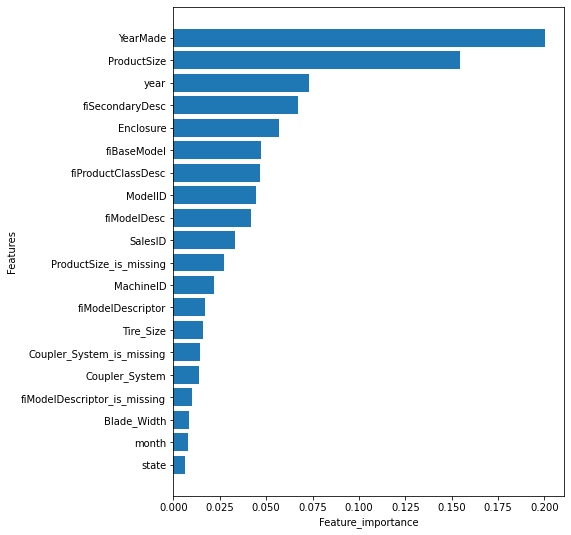

In [173]:
plt_features(x_train.columns, ideal_model.feature_importances_)


**Question to finish:1. Why might knowing the `feature_importances_` of a trained machine learning model be helpful?
2. Which other machine learning  models could be used on this dataset?**
* Hint: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html, check out regression section of this map, or try to look something like CatBoost.ai or XGBost.ai